# 1. Business Understanding


Aufgrund der großen Auswahl, die Netflix zu bieten hat, ist es für die Nutzer schwierig, geeignete Filme für sich zu finden. Die Suche in der Bibliothek nimmt viel Zeit in Anspruch und schafft ein schlechtes Nutzererlebnis, was wiederum zu höheren Abbruchquoten führt.
Um die Abbruchquoten zu senken, muss geprüft werden, ob die Kundenzufriedenheit durch die Anwendung von maschinellem Lernen in Bezug auf Filmempfehlungen erhöht werden kann.


Der Datensatz enthält Filmdaten aus dem tmdb Dataset.
Finden Sie heraus, welche Faktoren auf der Grundlage der Daten über die Beliebtheit oder Bewertung der Filme ergriffen werden können, um Strategien für das Unternehmen zu entwickeln.
Basierend auf dem obigen Geschäftsproblem definieren wir die abhängige Variable (y)

Problem 1: y = Popularität / Voting-Durchschnitt (Regressionsproblem)

# 2. Data Understanding 


Aus dem Datensatz ist ersichtlich, dass sowohl Zahlen als auch kategoriale Werte enthalten sind. Jede Kategorie bezieht sich auf den entsprechenden Film in der Zeile. So enthält beispielsweise die Spalte "Crew" mehrere Mitwirkende wie Autoren, Filmeditor usw., während "Cast" die Schauspieler enthält, die in den jeweiligen Filmen mitspielen. Außerdem hat jeder Film eine eindeutige ID, z. B. movie_id/id, die identisch ist und es ermöglicht, beide Datensätze zu kombinieren. Alle Daten sind sehr verständlich und selbsterklärend, und der Inhalt ist auf kaggle.com ausdrücklich beschrieben.

## 2.1 Import von relevanten Modulen

In [ ]:
Dieser Code-Block importiert Bibliotheken und Module, die für Datenanalyse, statistische Modellierung,
maschinelles Lernen und Visualisierung in Python verwendet werden.


In [1]:
import numpy as np
import pandas  as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt<
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set()


# statsmodels benötigt diese Funktion (chisqprob) von skipy für Berichte
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## 2.2 Daten einlesen

In [2]:
original_data = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Increase_customer_satisfaction_tmdb_5000_movies.csv')

In [3]:
original_data2 = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Increase_customer_satisfaction_tmdb_5000_credits.csv')

In [4]:
original_data = pd.merge(original_data, original_data2)

### Datenverständnis

In [ ]:
Die Tabelle listet Filme mit verschiedenen Attributen wie 
Budget, Genres, Webseite, ID, Schlüsselwörter, Originalsprache, Originaltitel, Zusammenfassung, 
Popularität, Produktionsfirmen, Laufzeit, gesprochene Sprachen, Status, Tagline, Titel, 
durchschnittliche Bewertung, Anzahl der Stimmen, Film-ID, Besetzung und Crew auf.

In [5]:
original_data.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   148.0   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  ...   165.0   
4        [{"name": "Walt Disney Pictures", "id": 2}]  ...   132.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count movie_id  \
0                                    Avatar          7.2      11800    19995   
1  Pirates of the Caribbean: At World's End          6.9       4500      285   
2                                   Spectre          6.3       4466   206647   
3                     The Dark Knight Rises          7.6       9106    49026   
4                               John Carter          6.1       2124    49529   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

In [ ]:
Die Tabelle fasst verschiedene Eigenschaften von Filmen zusammen, 
wie Budget, Genres, Homepage, ID, Schlüsselwörter, Originalsprache, Originaltitel, Zusammenfassung, 
Popularität, Produktionsfirmen, Laufzeit, gesprochene Sprachen, Status, Tagline, Titel, 
durchschnittliche Bewertung, Anzahl der Stimmen, Film-ID, Besetzung und Crew.

In [6]:
original_data.describe(include="all")

budget                         genres  \
count   4.809000e+03                           4809   
unique           NaN                           1175   
top              NaN  [{"id": 18, "name": "Drama"}]   
freq             NaN                            372   
mean    2.902780e+07                            NaN   
std     4.070473e+07                            NaN   
min     0.000000e+00                            NaN   
25%     7.800000e+05                            NaN   
50%     1.500000e+07                            NaN   
75%     4.000000e+07                            NaN   
max     3.800000e+08                            NaN   

                                 homepage             id keywords  \
count                                1713    4809.000000     4809   
unique                               1691            NaN     4222   
top     http://www.missionimpossible.com/            NaN       []   
freq                                    4            NaN      412   
mean                                  NaN   57120.571429      NaN   
std                                   NaN   88653.369849      NaN   
min                                   NaN       5.000000      NaN   
25%                                   NaN    9012.000000      NaN   
50%                                   NaN   14624.000000      NaN   
75%                                   NaN   58595.000000      NaN   
max                                   NaN  459488.000000      NaN   

       original_language   original_title  \
count               4809             4809   
unique                37             4801   
top                   en  Out of the Blue   
freq                4510                4   
mean                 NaN              NaN   
std                  NaN              NaN   
min                  NaN              NaN   
25%                  NaN              NaN   
50%                  NaN              NaN   
75%                  NaN              NaN   
max                  NaN              NaN   

                                                 overview   popularity  \
count                                                4806  4809.000000   
unique                                               4800          NaN   
top     Dennis Hopper is a hard-drinking truck driver ...          NaN   
freq                                                    2          NaN   
mean                                                  NaN    21.491664   
std                                                   NaN    31.803366   
min                                                   NaN     0.000000   
25%                                                   NaN     4.667230   
50%                                                   NaN    12.921594   
75%                                                   NaN    28.350529   
max                                                   NaN   875.581305   

       production_companies  ...      runtime  \
count                  4809  ...  4807.000000   
unique                 3697  ...          NaN   
top                      []  ...          NaN   
freq                    352  ...          NaN   
mean                    NaN  ...   106.882255   
std                     NaN  ...    22.602535   
min                     NaN  ...     0.000000   
25%                     NaN  ...    94.000000   
50%                     NaN  ...   103.000000   
75%                     NaN  ...   118.000000   
max                     NaN  ...   338.000000   

                                spoken_languages    status  \
count                                       4809      4809   
unique                                       544         3   
top     [{"iso_639_1": "en", "name": "English"}]  Released   
freq                                        3175      4801   
mean                                         NaN       NaN   
std                                          NaN       NaN   
min                                          NaN       NaN   
25%      

In [ ]:
Das ist eine Zusammenfassung eines Pandas DataFrame mit 4809 Einträgen und 23 Spalten, die verschiedene Informationen über Filme enthält, wie Budget, Genres, Homepage, ID, Schlüsselwörter, Sprache, Titel, Popularität, Produktionsfirmen, Einnahmen, Laufzeit, Bewertung, Stimmenzahl,
Besetzung und Crew.

In [7]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

## 2.3 Datenbereinigung

###  Auf Nullwerte prüfen

In [ ]:
Die Tabelle zeigt die Anzahl der fehlenden Werte in jeder Spalte eines DataFrame an, wobei z.B. die Spalte 'homepage' 3096 fehlende Werte hat, 
während viele andere Spalten keine fehlenden Werte aufweisen.

In [8]:
original_data.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

Der Code entfernt alle Zeilen im DataFrame original_data, die mindestens einen fehlenden Wert (NaN) enthalten, und speichert das Ergebnis in df_wo_null.

In [9]:
df_wo_null = original_data.dropna(axis=0)

Der Code gibt für jeden Spaltennamen im DataFrame df_wo_null die Anzahl der fehlenden Werte (NaN) zurück.

In [10]:
df_wo_null.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
movie_id                0
cast                    0
crew                    0
dtype: int64

### Auf Duplikate prüfen

Der Code filtert den DataFrame df_wo_null und gibt alle Zeilen zurück, die Duplikate enthalten, wobei alle Vorkommen der Duplikate beibehalten werden.

In [11]:
df_wo_null[df_wo_null.duplicated(keep=False)]

Empty DataFrame
Columns: [budget, genres, homepage, id, keywords, original_language, original_title, overview, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, vote_average, vote_count, movie_id, cast, crew]
Index: []

[0 rows x 23 columns]

## 2.4 Test auf Multikollinearität

In [ ]:
Die Tabelle zeigt, dass es keine fehlenden Werte in den Spalten für verschiedene Merkmale wie Budget, Genres, Homepage, usw. gibt.

Keine nicht-signifikanten Variablen mehr. Das endgültige Modell wird erstellt.

In [ ]:
Der Code erstellt eine Wärmebildkarte, die die Korrelationen zwischen den Spalten des DataFrames df_wo_null zeigt.

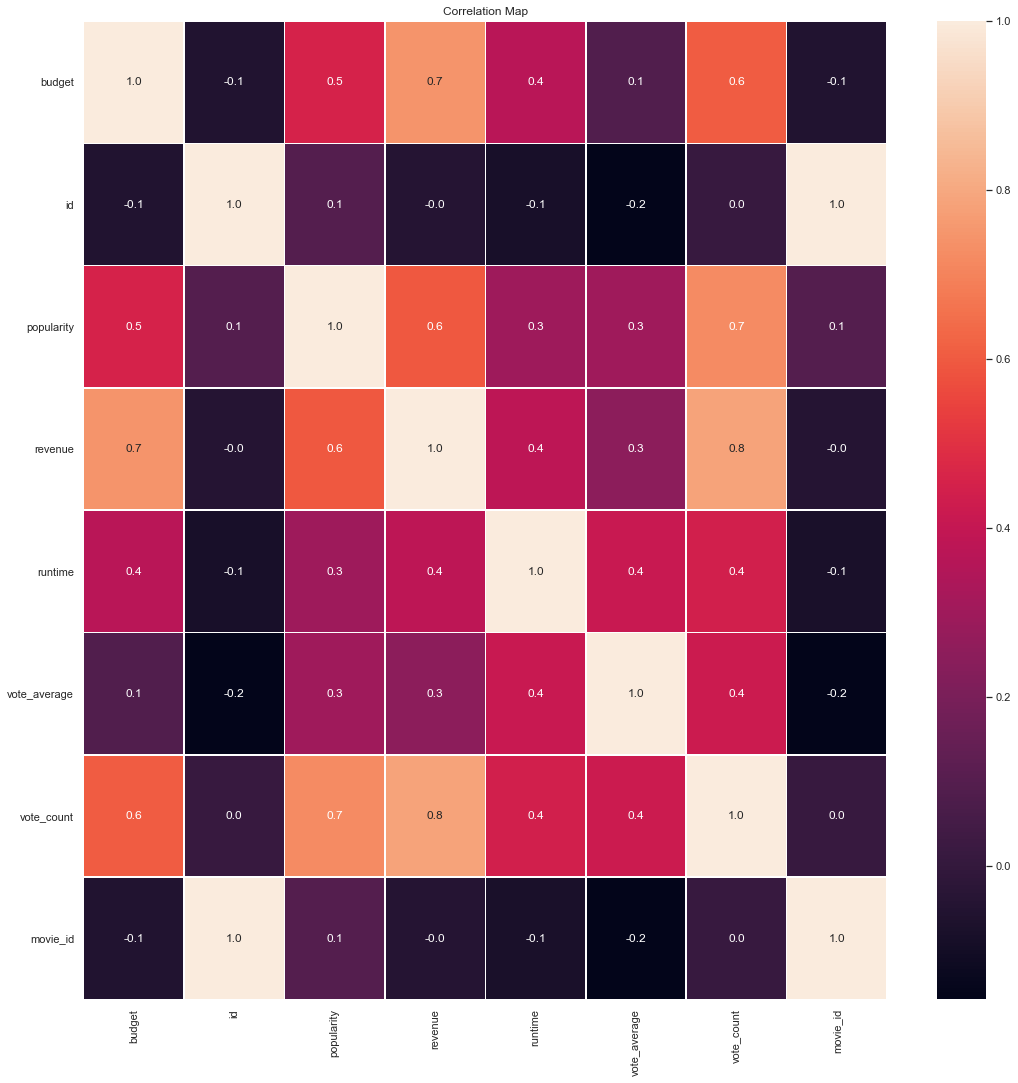

In [12]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df_wo_null.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

In [ ]:
Der Code entfernt die Spalten 'tagline', 'homepage', 'id' und 'movie_id' aus dem DataFrame df_wo_null.


In [13]:
df_wo_null = df_wo_null.drop(['tagline', 'homepage', 'id', 'movie_id'], axis = 1)

In [ ]:
Der Code erstellt und zeigt eine große Wärmebildkarte der Korrelationen 
zwischen den Spalten von df_wo_null mit Beschriftungen, Linien und einem Titel an.


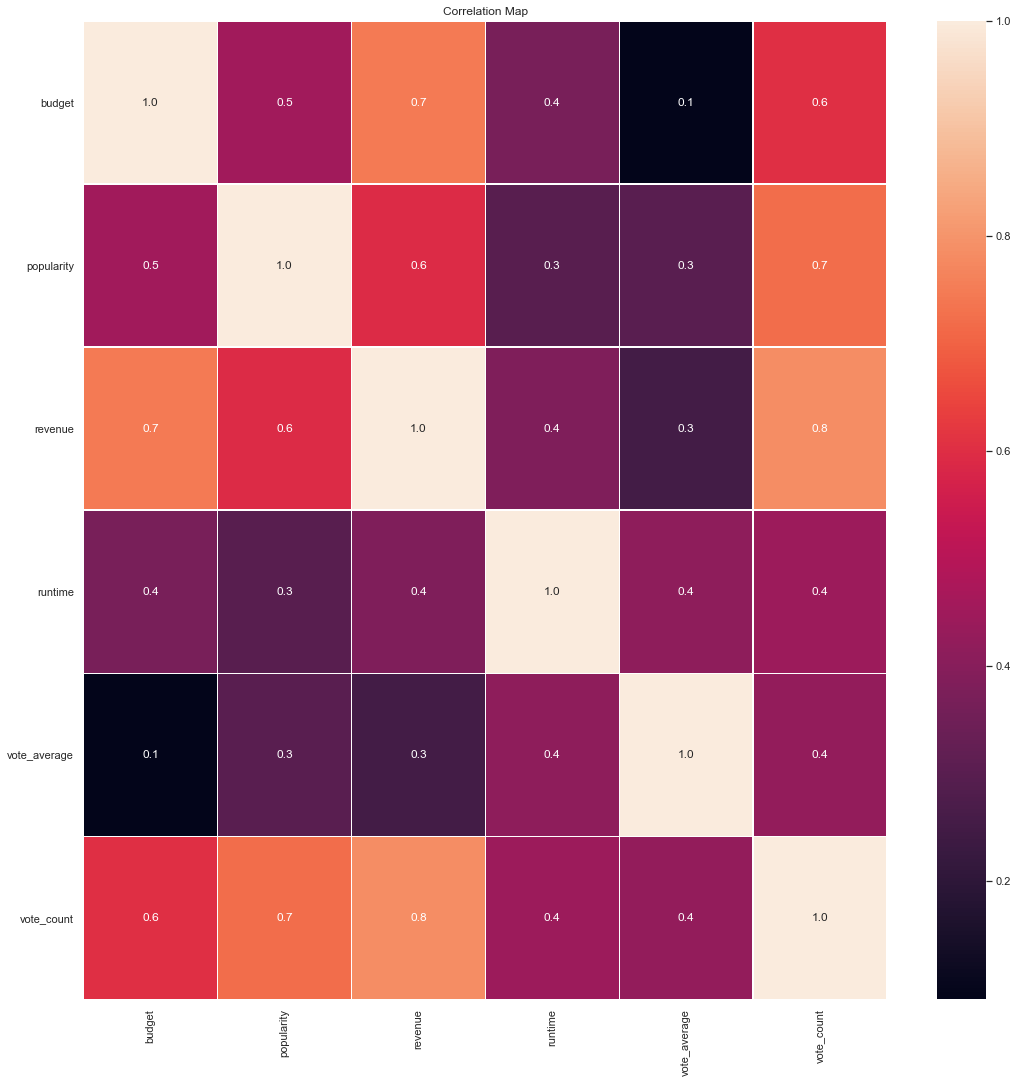

In [14]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df_wo_null.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

## 2.5 Deskriptive Analysise 

Der Code df_wo_null = df_wo_null.drop(['status', 'original_title', 'overview'], axis=1) entfernt die Spalten status, original_title und overview aus dem DataFrame df_wo_null.

In [15]:
df_wo_null = df_wo_null.drop(['status', 'original_title', 'overview'], axis = 1)

Der Code entfernt die Spalten production_countries, original_language, crew und spoken_languages aus dem DataFrame df_wo_null.

In [16]:
df_wo_null = df_wo_null.drop(['production_countries', 'original_language', 'crew', 'spoken_languages'], axis = 1)

Der Code entfernt die Spalten runtime, keywords, vote_average und budget aus dem DataFrame df_wo_null.

In [17]:
df_wo_null = df_wo_null.drop(['runtime', 'keywords', 'vote_average', 'budget'], axis = 1)

In [ ]:
Die Tabelle listet Filme mit ihren Genres, Popularität, Produktionsfirmen, Veröffentlichungsdatum, Einnahmen, Titel, 
Anzahl der Stimmen und Besetzung auf.

In [18]:
df_wo_null.head()

genres  popularity  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  150.437577   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...  139.082615   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  107.376788   
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...  112.312950   
4  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   43.926995   

                                production_companies release_date     revenue  \
0  [{"name": "Ingenious Film Partners", "id": 289...   2009-12-10  2787965087   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   2007-05-19   961000000   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   2015-10-26   880674609   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   2012-07-16  1084939099   
4        [{"name": "Walt Disney Pictures", "id": 2}]   2012-03-07   284139100   

                                      title  vote_count  \
0                                    Avatar       11800   
1  Pirates of the Caribbean: At World's End        4500   
2                                   Spectre        4466   
3                     The Dark Knight Rises        9106   
4                               John Carter        2124   

                                                cast  
0  [{"cast_id": 242, "character": "Jake Sully", "...  
1  [{"cast_id": 4, "character": "Captain Jack Spa...  
2  [{"cast_id": 1, "character": "James Bond", "cr...  
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...  
4  [{"cast_id": 5, "character": "John Carter", "c...

# 3. Datenaufbereitung

In diesem Abschnitt, werden die textlichen Daten in der Spalte genres des DataFrames df_wo_null aufzubereiten, indem das zweite Element nach dem Komma in der neuen Spalte genre1 und das vierte Element nach dem Komma in der neuen Spalte genre2 speichert. Anschließend wird beides nach Doppelpunkten und Anführungszeichen aufteilt, und das zweite Element in jeder Spalte zurückspeichert

## 3.1 Erfassung kategorialer Variablen

Der Code teilt die Zeichenfolgen in der Spalte genres von df_wo_null anhand des Kommas (,) auf und speichert das zweite Element (Index 1) der resultierenden Liste in der neuen Spalte genre1.

In [19]:
df_wo_null['genre1'] = df_wo_null['genres'].str.split(',').str[1]

Der Code teilt die Zeichenfolgen in der Spalte genre1 von df_wo_null anhand des Doppelpunkts (:) auf und speichert das zweite Element (Index 1) der resultierenden Liste wieder in der Spalte genre1.

In [20]:
df_wo_null['genre1'] = df_wo_null['genre1'].str.split(':').str[1]

Der Code nimmt den Inhalt der Spalte genre1 im DataFrame df_wo_null, teilt ihn anhand des Anführungszeichens (") auf und speichert das zweite Element (Index 1) der resultierenden Liste zurück in der Spalte genre1.

In [21]:
df_wo_null['genre1'] = df_wo_null['genre1'].str.split('"').str[1]

Der Code extrahiert das vierte Element (Index 3) aus der durch Kommas getrennten Liste von Genres in der Spalte genres des DataFrames df_wo_null und speichert es in der neuen Spalte genre2.

In [22]:
df_wo_null['genre2'] = df_wo_null['genres'].str.split(',').str[3]

Der Code teilt die Zeichenfolgen in der Spalte genre2 von df_wo_null anhand des Doppelpunkts (:) und speichert das zweite Element (Index 1) der resultierenden Liste wieder in der Spalte genre2.

In [23]:
df_wo_null['genre2'] = df_wo_null['genre2'].str.split(':').str[1]

Der Code teilt die Zeichenfolgen in der Spalte genre2 von df_wo_null anhand des Anführungszeichens (") und speichert das zweite Element (Index 1) der resultierenden Liste wieder in der Spalte genre2.

In [24]:
df_wo_null['genre2'] = df_wo_null['genre2'].str.split('"').str[1]

Der Code entfernt die Spalte genres aus dem DataFrame df_wo_null und speichert das Ergebnis in df_1.

In [25]:
df_1 = df_wo_null.drop(['genres'], axis = 1)

In [ ]:
Die Tabelle zeigt die Anzahl der fehlenden Werte in den angegebenen Spalten eines DataFrames,
wobei z.B. 'genre2' 232 fehlende Werte und 'popularity' keine fehlenden Werte aufweist.


In [26]:
df_1.isnull().sum()

popularity                0
production_companies      0
release_date              0
revenue                   0
title                     0
vote_count                0
cast                      0
genre1                    2
genre2                  232
dtype: int64

In [27]:
df_1["new_genres"] = df_1["genre1"] +","+ df_1["genre2"]

In [28]:
df_2 = df_1.drop(['genre1', 'genre2'], axis = 1)

In [ ]:
Die Tabelle zeigt die Anzahl der fehlenden Werte in bestimmten Spalten eines DataFrames, 
wobei die Spalte 'new_genres' 232 fehlende Werte und die anderen aufgeführten Spalten keine fehlenden Werte aufweisen.


In [29]:
df_2.isnull().sum()

popularity                0
production_companies      0
release_date              0
revenue                   0
title                     0
vote_count                0
cast                      0
new_genres              232
dtype: int64

Der Code entfernt alle Zeilen aus dem DataFrame df_2, die mindestens einen fehlenden Wert enthalten, und speichert das bereinigte DataFrame wieder in df_2.

In [30]:
df_2 = df_2.dropna(axis=0)

Der Code extrahiert das Jahr aus der Spalte release_date im DataFrame df_2, indem er die Zeichenfolge an den Bindestrichen trennt und das erste Element (Index 0) der resultierenden Liste in der neuen Spalte year speichert.

In [31]:
df_2['year'] = df_2['release_date'].str.split('-').str[0]

Der Code wandelt die Werte in der Spalte year des DataFrames df_2 in Ganzzahlen (Integer) um.

In [32]:
df_2['year'] = df_2['year'].astype(int)

In [ ]:
Die Tabelle beschreibt einen Pandas DataFrame mit 1262 Einträgen und 9 Spalten, 
die verschiedene Filmattribute wie Popularität, Produktionsfirmen, Veröffentlichungsdatum, 
Einnahmen, Titel, Stimmenanzahl, Besetzung, #neue Genres und Jahr enthalten, wobei keine Spalte fehlende Werte aufweist.

In [33]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 0 to 4802
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            1262 non-null   float64
 1   production_companies  1262 non-null   object 
 2   release_date          1262 non-null   object 
 3   revenue               1262 non-null   int64  
 4   title                 1262 non-null   object 
 5   vote_count            1262 non-null   int64  
 6   cast                  1262 non-null   object 
 7   new_genres            1262 non-null   object 
 8   year                  1262 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 98.6+ KB


Der Code entfernt die Spalte release_date aus dem DataFrame df_2 und speichert das bereinigte DataFrame in df_3.

In [34]:
df_3 = df_2.drop(['release_date'], axis = 1)

In [ ]:
Die Tabelle enthält Informationen über Filme mit Attributen wie Popularität, Produktionsfirmen, 
Einnahmen, Titel, Stimmenanzahl, Besetzung, Genres und Jahr für insgesamt 1262 Filme.


In [35]:
df_3

popularity                               production_companies  \
0     150.437577  [{"name": "Ingenious Film Partners", "id": 289...   
1     139.082615  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2     107.376788  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3     112.312950  [{"name": "Legendary Pictures", "id": 923}, {"...   
4      43.926995        [{"name": "Walt Disney Pictures", "id": 2}]   
...          ...                                                ...   
4764   27.662696  [{"name": "Automatik Entertainment", "id": 281...   
4772    3.277287  [{"name": "FM Productions", "id": 12601}, {"na...   
4778    1.330379                                                 []   
4787    0.048948                                                 []   
4802   23.307949                 [{"name": "Thinkfilm", "id": 446}]   

         revenue                                     title  vote_count  \
0     2787965087                                    Avatar       11800   
1      961000000  Pirates of the Caribbean: At World's End        4500   
2      880674609                                   Spectre        4466   
3     1084939099                     The Dark Knight Rises        9106   
4      284139100                               John Carter        2124   
...          ...                                       ...         ...   
4764      600896                                The Signal         631   
4772      321952                            The Last Waltz          64   
4778       10000                              Down Terrace          26   
4787           0                                 Dry Spell           1   
4802      424760                                    Primer         658   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4     [{"cast_id": 5, "character": "John Carter", "c...   
...                                                 ...   
4764  [{"cast_id": 1, "character": "Nic Eastman", "c...   
4772  [{"cast_id": 1, "character": "Himself", "credi...   
4778  [{"cast_id": 4, "character": "Bill", "credit_i...   
4787  [{"cast_id": 4, "character": "Sasha", "credit_...   
4802  [{"cast_id": 1, "character": "Aaron", "credit_...   

                    new_genres  year  
0             Action,Adventure  2009  
1            Adventure,Fantasy  2007  
2             Action,Adventure  2015  
3                 Action,Crime  2012  
4             Action,Adventure  2012  
...                        ...   ...  
4764  Thriller,Science Fiction  2014  
4772         Documentary,Music  1978  
4778              Drama,Action  2009  
4787            Comedy,Romance  2013  
4802     Science Fiction,Drama  2004  

[1262 rows x 8 columns]

Der Code extrahiert das sechste Element (Index 5) aus der durch Kommas getrennten Liste in der Spalte 'cast' des DataFrames df_3 und speichert es zurück in der Spalte 'cast'.

In [36]:
df_3['cast'] = df_3['cast'].str.split(',').str[5]

Der Code teilt die Zeichenfolgen in der Spalte 'cast' des DataFrames df_3 anhand des Doppelpunkts (:) auf und speichert das zweite Element (Index 1) der resultierenden Liste zurück in der Spalte 'cast'.

In [37]:
df_3['cast'] = df_3['cast'].str.split(':').str[1]

Der Code teilt die Zeichenfolgen in der Spalte 'cast' des DataFrames df_3 anhand des Anführungszeichens (") auf und speichert das zweite Element (Index 1) der resultierenden Liste zurück in der Spalte 'cast'.

In [38]:
df_3['cast'] = df_3['cast'].str.split('"').str[1]

Der Code teilt die Zeichenfolgen in der Spalte 'production_companies' des DataFrames df_3 anhand des Kommas (') auf und speichert das erste Element (Index 0) der resultierenden Liste zurück in der Spalte 'production_companies'.

In [39]:
df_3['production_companies'] = df_3['production_companies'].str.split(',').str[0]

Der Code teilt die Zeichenfolgen in der Spalte 'production_companies' des DataFrames df_3 anhand des Doppelpunkts (:) auf und speichert das zweite Element (Index 1) der resultierenden Liste zurück in der Spalte 'production_companies'.

In [40]:
df_3['production_companies'] = df_3['production_companies'].str.split(':').str[1]

Der Code teilt die Zeichenfolgen in der Spalte 'production_companies' des DataFrames df_3 anhand des Anführungszeichens (") auf und speichert das zweite Element (Index 1) der resultierenden Liste zurück in der Spalte 'production_companies'.

In [41]:
df_3['production_companies'] = df_3['production_companies'].str.split('"').str[1]

In [ ]:
Der Code bearbeitet die Spalten 'cast' und 'production_companies', 
um bestimmte Informationen zu extrahieren und zu trennen, wobei fehlende Werte in diesen Spalten identifiziert werden.


In [42]:
df_3.isnull().sum()

popularity               0
production_companies    22
revenue                  0
title                    0
vote_count               0
cast                     5
new_genres               0
year                     0
dtype: int64

In [43]:
df_5 = df_3.dropna(axis=0)

# 4. Modellierung und Evaluation

## 4.1 Test und Trainieren der Daten

In [ ]:
Die Tabelle listet Filme mit ihren Popularitätsbewertungen, Produktionsfirmen, Einnahmen, Titeln, 
Stimmenanzahl, Hauptdarstellern, Genres und Erscheinungsjahren auf.


In [44]:
df_5.head()

popularity     production_companies     revenue  \
0  150.437577  Ingenious Film Partners  2787965087   
1  139.082615     Walt Disney Pictures   961000000   
2  107.376788        Columbia Pictures   880674609   
3  112.312950       Legendary Pictures  1084939099   
4   43.926995     Walt Disney Pictures   284139100   

                                      title  vote_count             cast  \
0                                    Avatar       11800  Sam Worthington   
1  Pirates of the Caribbean: At World's End        4500      Johnny Depp   
2                                   Spectre        4466     Daniel Craig   
3                     The Dark Knight Rises        9106   Christian Bale   
4                               John Carter        2124    Taylor Kitsch   

          new_genres  year  
0   Action,Adventure  2009  
1  Adventure,Fantasy  2007  
2   Action,Adventure  2015  
3       Action,Crime  2012  
4   Action,Adventure  2012

Der Code benennt die Spalte 'cast' in 'star' im DataFrame df_5 um und speichert das Ergebnis in df_6.

In [45]:
df_6 = df_5.rename({"cast":"star"}, axis=1)

In [ ]:
Die Tabelle enthält Informationen über den Erfolg von Filmen, darunter Popularität, 
Produktionsunternehmen, Einnahmen, Titel, Stimmenzahl, Hauptdarsteller, Genres und Jahr der Veröffentlichung.

In [46]:
df_6.head()

popularity     production_companies     revenue  \
0  150.437577  Ingenious Film Partners  2787965087   
1  139.082615     Walt Disney Pictures   961000000   
2  107.376788        Columbia Pictures   880674609   
3  112.312950       Legendary Pictures  1084939099   
4   43.926995     Walt Disney Pictures   284139100   

                                      title  vote_count             star  \
0                                    Avatar       11800  Sam Worthington   
1  Pirates of the Caribbean: At World's End        4500      Johnny Depp   
2                                   Spectre        4466     Daniel Craig   
3                     The Dark Knight Rises        9106   Christian Bale   
4                               John Carter        2124    Taylor Kitsch   

          new_genres  year  
0   Action,Adventure  2009  
1  Adventure,Fantasy  2007  
2   Action,Adventure  2015  
3       Action,Crime  2012  
4   Action,Adventure  2012

Der Code entfernt die Spalte 'year' aus dem DataFrame df_6 und speichert das bereinigte DataFrame in df_7.

In [47]:
df_7 = df_6.drop(['year'], axis = 1)

Der Code entfernt alle Zeilen aus dem DataFrame df_7, die mindestens einen fehlenden Wert enthalten, und speichert das bereinigte DataFrame in df_cleaned.

In [48]:
df_cleaned = df_7.dropna(axis=0)

In [ ]:
Die Ausgabe zeigt ein Array von Diagrammen, das die Verteilung der Popularität, 
Einnahmen und Stimmenzahl der Filme in der Tabelle visualisiert.


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'vote_count'}>, <AxesSubplot:>]],
      dtype=object)

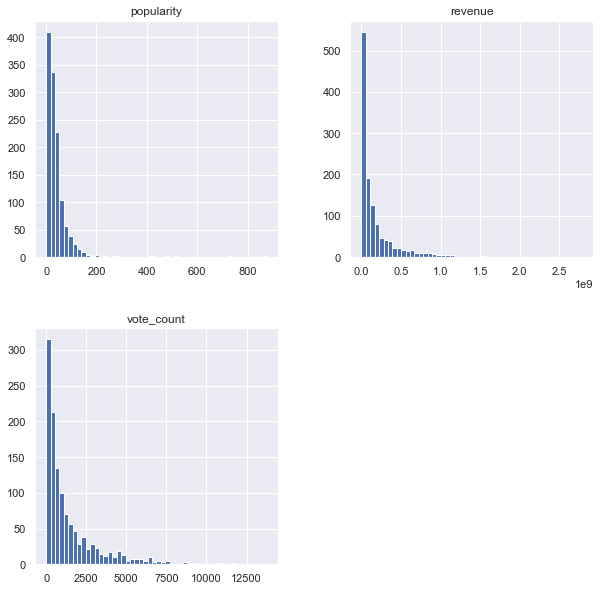

In [49]:
df_cleaned.hist(figsize=(10,10), bins=50)

In [ ]:
Diese Meldung warnt davor, dass die Funktion distplot in zukünftigen Versionen von Seaborn nicht mehr unterstützt wird 
und stattdessen displot oder histplot verwendet werden sollte.


/Users/Jumana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

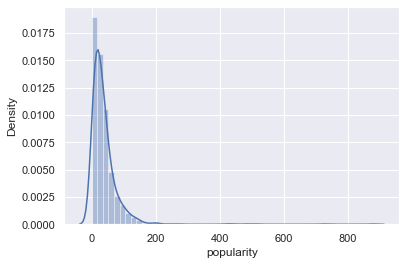

In [50]:
sns.distplot(df_cleaned['popularity'])

Der Code berechnet das 99. Perzentil (Quantil) der Spalte 'popularity' im DataFrame df_cleaned und erstellt dann data_1, einen neuen DataFrame, der nur die Zeilen aus df_cleaned enthält, deren 'popularity' kleiner als dieses 99. Perzentil ist.

In [51]:
q = df_cleaned['popularity'].quantile(0.99)

data_1 = df_cleaned[df_cleaned['popularity']<q]

In [ ]:
Die Meldung weist darauf hin, dass die Funktion distplot in zukünftigen Versionen nicht mehr unterstützt wird 
und empfiehlt die Verwendung von displot oder histplot als Alternative.

/Users/Jumana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

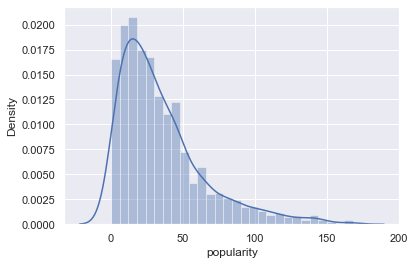

In [52]:
sns.distplot(data_1['popularity'])

Der Code berechnet das 1. Perzentil (Quantil) der Spalte 'vote_count' im DataFrame data_1 und erstellt dann data_2, einen neuen DataFrame, der nur die Zeilen aus data_1 enthält, deren 'vote_count' größer als dieses 1. Perzentil ist.

In [53]:
q = data_1['vote_count'].quantile(0.01)

data_2 = data_1[data_1['vote_count']>q]

In [ ]:
Die Tabelle liefert statistische Informationen über die Popularität, Einnahmen und Stimmenzahl von Filmen, 
einschließlich der Anzahl der Datensätze, Durchschnittswerte, Standardabweichungen und Quartile.

In [54]:
data_2.describe()

popularity       revenue    vote_count
count  1208.000000  1.208000e+03   1208.000000
mean     35.506440  1.669286e+08   1405.486755
std      29.940760  2.455862e+08   1752.879308
min       0.132878  0.000000e+00      9.000000
25%      13.768277  1.529117e+07    279.250000
50%      27.153374  7.233776e+07    712.000000
75%      46.832955  2.054128e+08   1805.500000
max     167.932870  2.787965e+09  13752.000000

In [ ]:
Die Meldung informiert darüber, dass die Funktion distplot in Zukunft nicht mehr unterstützt wird 
und empfiehlt stattdessen die Verwendung von displot oder histplot.

/Users/Jumana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote_count', ylabel='Density'>

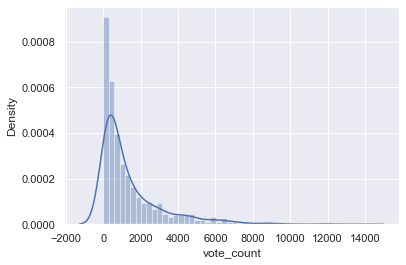

In [55]:
sns.distplot(data_2['vote_count'])

In [56]:
#q = data_2['revenue'].quantile(0.99)

data_3 = data_2[data_2['revenue']<1.5e+09]

In [ ]:
Die Ausgabe zeigt ein Array von Diagrammen, das die Verteilung der Popularität, 
Einnahmen und Stimmenzahl von Filmen visualisiert.

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'vote_count'}>, <AxesSubplot:>]],
      dtype=object)

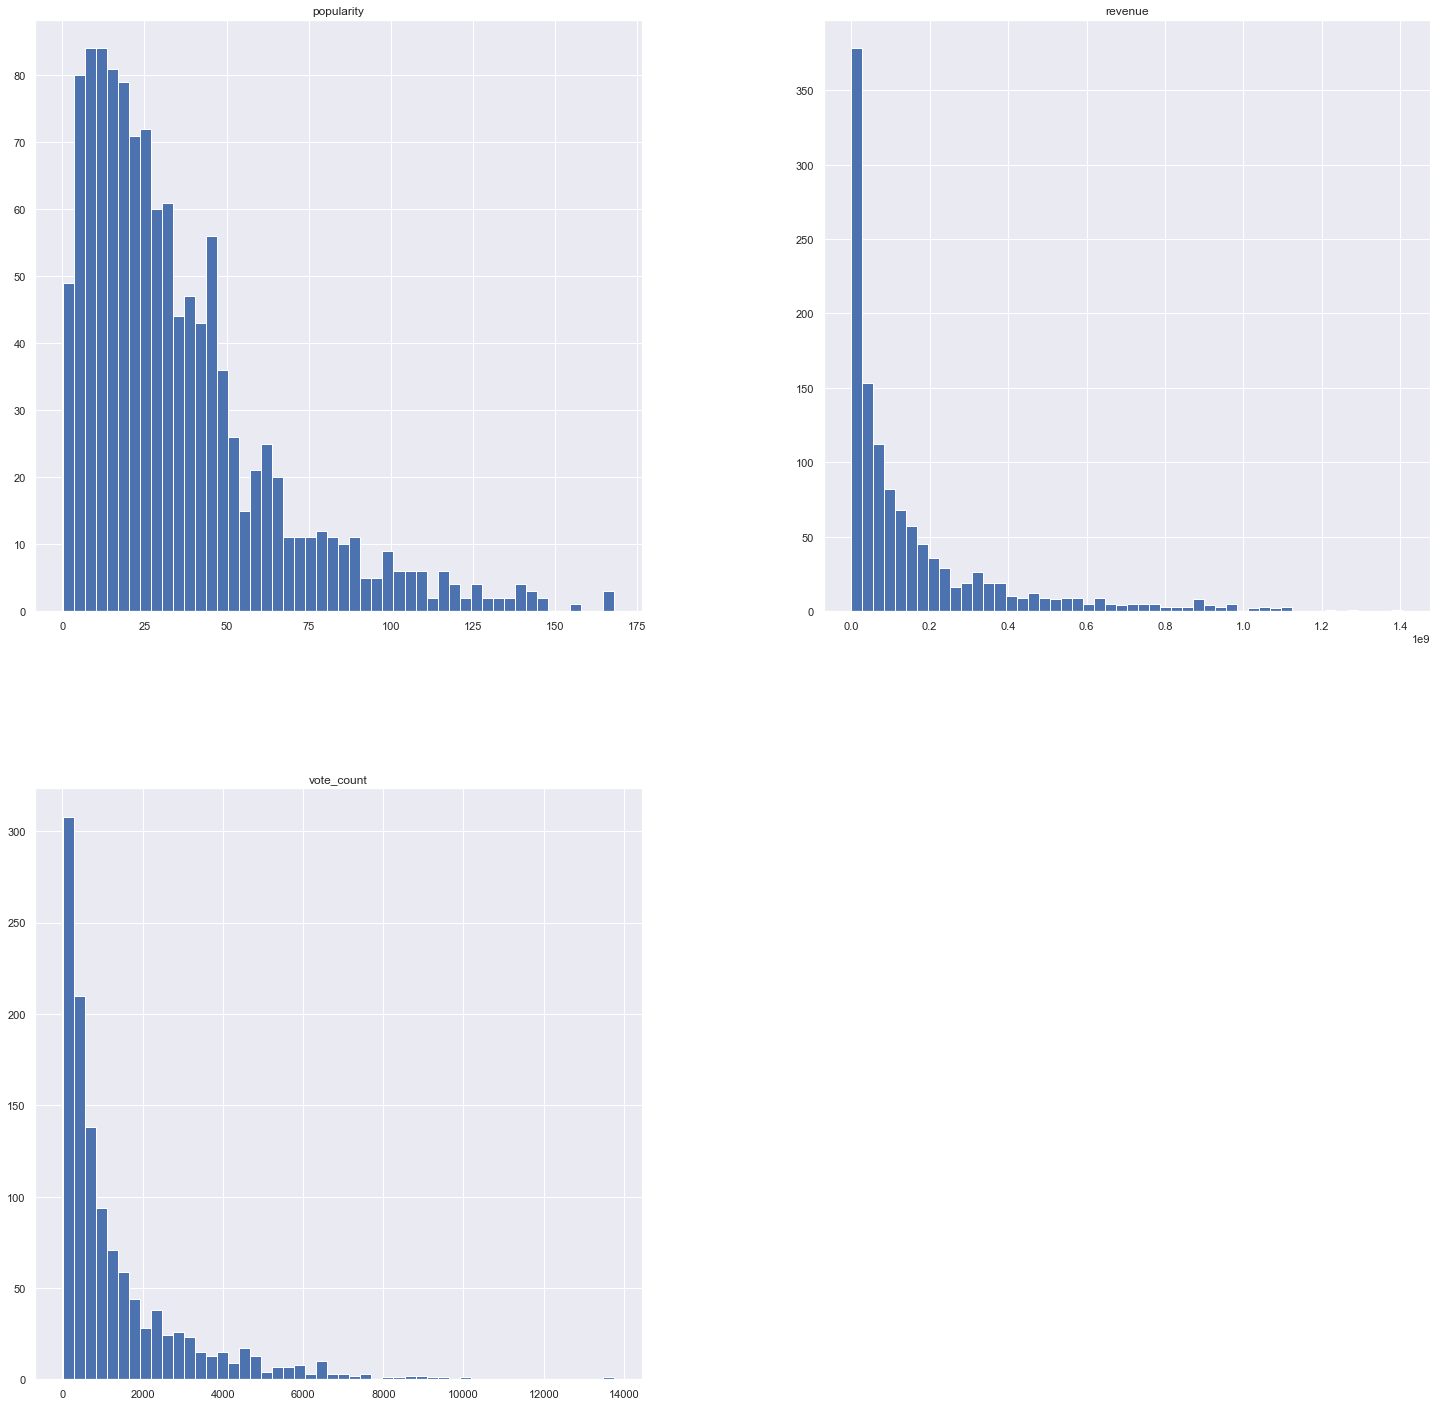

In [57]:
data_3.hist(figsize=(25,25), bins=50)

Der Code setzt den Index des DataFrame data_3 zurück und speichert das Ergebnis in data_final, wobei der alte Index verworfen wird.

In [58]:
data_final = data_3.reset_index(drop=True)

Der Code wandelt die Werte in der Spalte revenue des DataFrames data_final in Fließkommazahlen (float) um.

In [59]:
data_final['revenue'] = data_final['revenue'].astype(float)

In [ ]:
Die Tabelle enthält Informationen über die Popularität, Produktionsunternehmen, Einnahmen, Titel, 
Stimmenanzahl, Hauptdarsteller und Genres von verschiedenen Filmen.

In [60]:
data_final.head()

popularity  production_companies       revenue  \
0  139.082615  Walt Disney Pictures  9.610000e+08   
1  107.376788     Columbia Pictures  8.806746e+08   
2  112.312950    Legendary Pictures  1.084939e+09   
3   43.926995  Walt Disney Pictures  2.841391e+08   
4  115.699814     Columbia Pictures  8.908716e+08   

                                      title  vote_count            star  \
0  Pirates of the Caribbean: At World's End        4500     Johnny Depp   
1                                   Spectre        4466    Daniel Craig   
2                     The Dark Knight Rises        9106  Christian Bale   
3                               John Carter        2124   Taylor Kitsch   
4                              Spider-Man 3        3576   Tobey Maguire   

          new_genres  
0  Adventure,Fantasy  
1   Action,Adventure  
2       Action,Crime  
3   Action,Adventure  
4     Fantasy,Action

In [ ]:
Die Tabelle gibt statistische Zusammenfassungen über die Merkmale "Popularität", "Produktionsunternehmen", 
"Einnahmen", "Titel", "Stimmenanzahl", "Hauptdarsteller" und "Genres" von Filmen an, 
einschließlich Anzahl der Datensätze, eindeutiger Werte, häufigster Wert, Mittelwerte, 
Standardabweichungen, und Quartile.

In [61]:
data_final.describe(include='all')

popularity production_companies       revenue     title  \
count   1205.000000                 1205  1.205000e+03      1205   
unique          NaN                  413           NaN      1204   
top             NaN   Universal Pictures           NaN  The Host   
freq            NaN                   91           NaN         2   
mean      35.267109                  NaN  1.622383e+08       NaN   
std       29.569232                  NaN  2.255582e+08       NaN   
min        0.132878                  NaN  0.000000e+00       NaN   
25%       13.707843                  NaN  1.525000e+07       NaN   
50%       27.082182                  NaN  7.210861e+07       NaN   
75%       46.630062                  NaN  2.034276e+08       NaN   
max      167.932870                  NaN  1.405404e+09       NaN   

          vote_count        star    new_genres  
count    1205.000000        1205          1205  
unique           NaN         659           132  
top              NaN  Matt Damon  Comedy,Drama  
freq             NaN          14            73  
mean     1383.145228         NaN           NaN  
std      1693.870514         NaN           NaN  
min         9.000000         NaN           NaN  
25%       277.000000         NaN           NaN  
50%       705.000000         NaN           NaN  
75%      1798.000000         NaN           NaN  
max     13752.000000         NaN           NaN

In [ ]:
Die Tabelle zeigt, dass es keine fehlenden Werte für die Merkmale 
"Popularität", "Produktionsunternehmen", "Einnahmen", "Titel", "Stimmenanzahl", "Hauptdarsteller" und "Genres" gibt.

In [62]:
data_final.isnull().sum()

popularity              0
production_companies    0
revenue                 0
title                   0
vote_count              0
star                    0
new_genres              0
dtype: int64

In [63]:
data_final.columns.values

array(['popularity', 'production_companies', 'revenue', 'title',
       'vote_count', 'star', 'new_genres'], dtype=object)

In [ ]:
Der Code definiert ein Pandas DataFrame mit 1205 Einträgen und 7 Spalten, 
die verschiedene Datentypen wie Float, Integer und Object enthalten.

In [64]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            1205 non-null   float64
 1   production_companies  1205 non-null   object 
 2   revenue               1205 non-null   float64
 3   title                 1205 non-null   object 
 4   vote_count            1205 non-null   int64  
 5   star                  1205 non-null   object 
 6   new_genres            1205 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 66.0+ KB


In [ ]:
Der Code berechnet die VIF (Variance Inflation Factor) für numerische Variablen wie 
"Einnahmen" und "Stimmenanzahl" 
aus einem DataFrame und speichert die Ergebnisse zusammen mit den Variablennamen in einem neuen DataFrame.

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Since categorical data is not preprocessed, take only the numerical data.
variables = data_final[['revenue', 'vote_count']]

# Create a new data frame which includes all VIFs (Variance Inflation Factor)
# Each variable has its own variance inflation factor. This measure is variable specific
vif = pd.DataFrame()

# Make use of the variance_inflation_factor module, output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

# Include variable names so it is easier to explore the result
vif["Features"] = variables.columns

In [ ]:
Die Tabelle zeigt die berechneten VIF (Variance Inflation Factor) Werte für die Merkmale 
"Einnahmen" und "Stimmenanzahl", sowie die zugehörigen Merkmalsnamen.


In [66]:
# Explore the result
vif

VIF    Features
0  3.741807     revenue
1  3.741807  vote_count

In [67]:
# Remove 'Year' as feature with the highest VIF from the model
data_final = data_final.drop(['star', 'production_companies'],axis=1)

In [ ]:
Die Tabelle bietet eine statistische Zusammenfassung der Merkmale "Popularität", "Einnahmen", "Titel", "Stimmenanzahl" und "Genres" von Filmen, einschließlich der Anzahl der Datensätze, der eindeutigen Werte, des am häufigsten auftretenden Titels, der Durchschnittswerte,
der Standardabweichungen und der Quartile.

In [68]:
data_final.describe(include='all')

popularity       revenue     title    vote_count    new_genres
count   1205.000000  1.205000e+03      1205   1205.000000          1205
unique          NaN           NaN      1204           NaN           132
top             NaN           NaN  The Host           NaN  Comedy,Drama
freq            NaN           NaN         2           NaN            73
mean      35.267109  1.622383e+08       NaN   1383.145228           NaN
std       29.569232  2.255582e+08       NaN   1693.870514           NaN
min        0.132878  0.000000e+00       NaN      9.000000           NaN
25%       13.707843  1.525000e+07       NaN    277.000000           NaN
50%       27.082182  7.210861e+07       NaN    705.000000           NaN
75%       46.630062  2.034276e+08       NaN   1798.000000           NaN
max      167.932870  1.405404e+09       NaN  13752.000000           NaN

Der Code erstellt Dummy-Variablen für kategorische Variablen im DataFrame data_final, wobei die erste Kategorie jeder Variable entfernt wird, und speichert das Ergebnis in data_with_dummies.

In [69]:
data_with_dummies = pd.get_dummies(data_final, drop_first=True)

In [ ]:
Die Tabelle enthält binäre Indikatoren für das Vorhandensein bestimmter Filme in den Spalten 
"Titel" und Genres, zusammen mit numerischen Daten wie "Popularität", 
"Einnahmen" und "Stimmenanzahl" für jede dieser Filme.


In [70]:
data_with_dummies.head()

popularity       revenue  vote_count  title_(500) Days of Summer  \
0  139.082615  9.610000e+08        4500                           0   
1  107.376788  8.806746e+08        4466                           0   
2  112.312950  1.084939e+09        9106                           0   
3   43.926995  2.841391e+08        2124                           0   
4  115.699814  8.908716e+08        3576                           0   

   title_10 Cloverfield Lane  title_12 Rounds  \
0                          0                0   
1                          0                0   
2                          0                0   
3                          0                0   
4                          0                0   

   title_13 Hours: The Secret Soldiers of Benghazi  title_1408  title_1911  \
0                                                0           0           0   
1                                                0           0           0   
2                                                0           0           0   
3                                                0           0           0   
4                                                0           0           0   

   title_2 Guns  ...  new_genres_Thriller,Crime  \
0             0  ...                          0   
1             0  ...                          0   
2             0  ...                          0   
3             0  ...                          0   
4             0  ...                          0   

   new_genres_Thriller,Documentary  new_genres_Thriller,Drama  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   

   new_genres_Thriller,Horror  new_genres_Thriller,Mystery  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   new_genres_Thriller,Science Fiction  new_genres_War,Action  \
0                                    0                      0   
1                                    0                      0   
2                                    0                      0   
3                                    0                      0   
4                                    0                      0   

   new_genres_War,Crime  new_genres_War,Drama  new_genres_Western,Drama  
0                     0                     0                         0  
1                     0                     0                         0  
2                     0                     0                         0  
3                     0                     0                         0  
4                     0                     0                         0  

[5 rows x 1337 columns]

Der Code teilt den DataFrame data_with_dummies in zwei Teile auf: target enthält die Spalte 'popularity', die als Zielvariable verwendet wird, während predictors den Rest des DataFrames umfasst, bei dem die Spalte 'popularity' entfernt wurde und daher als Vorhersagevariablen fungiert.

In [71]:
target = data_with_dummies['popularity']
predictors = data_with_dummies.drop(['popularity'],axis=1)

In [72]:
# 80-20 split into training and test data
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=123)

In [ ]:
Der Code standardisiert die Merkmale eines Trainingsdatensatzes 
und wendet dieselbe Transformation auf Trainings- und Testdaten an.


In [73]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
Der Code erstellt ein lineares Regressionsmodell und passt es an den Trainingsdatensatz an.

In [74]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
Der Code berechnet die Leistung eines linearen Regressionsmodells auf dem Trainingsdatensatz 
und dem Testdatensatz und gibt die Ergebnisse aus.

In [75]:
print('training performance')
print(reg.score(X_train,y_train))
print('test performance')
print(reg.score(X_test,y_test))

training performance
1.0
test performance
0.5546065264388957


## 4.2 Lineare Regression

In [ ]:
Der Code führt eine Vorhersage basierend auf einem Modell durch, vergleicht die Vorhersagen mit den tatsächlichen Werten 
und visualisiert die Ergebnisse durch Diagramme und Streudiagramme mit einer Regressionslinie.


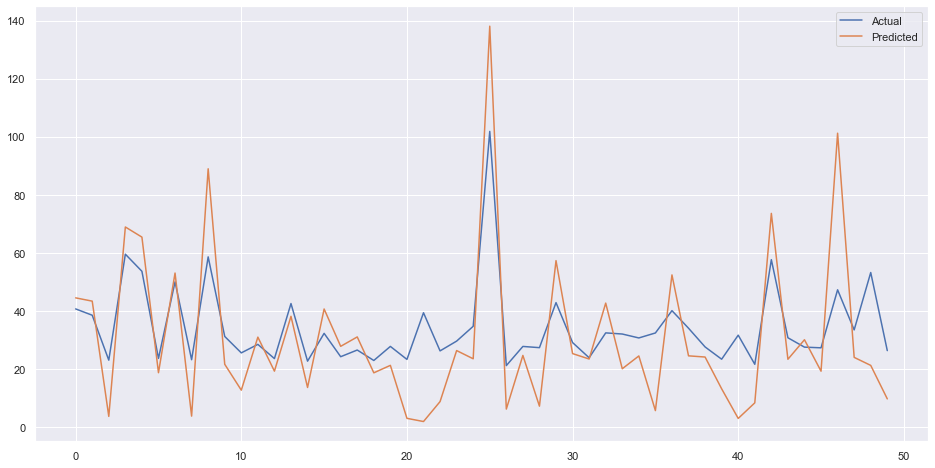

In [76]:
y_pred = reg.predict(X_test)
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

# 5. Evaluation

Die Analyse des Datensatzes aus dem tmdb-Dataset zur Verbesserung der Filmempfehlungen auf Netflix legt nahe, 
dass eine Vielzahl von Faktoren die Beliebtheit oder Bewertungen der Filme beeinflussen können.
Dazu gehören sowohl numerische als auch kategoriale Daten wie Crewmitglieder, Besetzung und eindeutige IDs. 
Durch die Anwendung von maschinellem Lernen auf diese Daten können Strategien entwickelt werden, 
um die Kundenzufriedenheit zu erhöhen und Abbruchquoten zu senken. 
Eine gründliche Analyse und Modellierung dieser Faktoren ermöglicht es, personalisierte Empfehlungen zu generieren 
und das Nutzererlebnis zu verbessern. Das Fazit dieser Umsetzung ist, dass die Daten eine solide Grundlage bieten, 
um innovative Lösungen zur Filmempfehlung zu entwickeln, die die Zufriedenheit der Netflix-Nutzer steigern können.

# 6. Umsetzung 

Um die Abbruchquoten bei Netflix zu senken und die Kundenzufriedenheit zu steigern, können maschinelles Lernen und Datenanalyse genutzt werden, um relevante Faktoren wie Crewmitglieder, Besetzung und Genre zu identifizieren und ein Modell zu trainieren, das die Beliebtheit oder Bewertungen von Filmen vorhersagt,
was zu personalisierten Empfehlungen führt.